# Data Analysis with python II

## Melany Nadine Monroy Icaza

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

### Problem 1.

#### 1.1 Calculate the pressure of the plasma permeating the Solar corona. How does it compare to Earth's atmospheric pressure at the sea level? The number density of the Solar corona is $n=10^9\,\rm cm^{-3}$ and its temperature is $T=2\times 10^6\,\rm K$.

In [13]:
# Define the EOS equation
def pressure(x, y):
    return (x*1.38e-16*y)

In [14]:
print('Pressure of the plasma permeating the Solar corona:', "{:0.5e}".format(pressure(10**(9),2*10**6.0)))
print('Dry air in the atmosphere of our planet:', "{:0.5e}".format(pressure(2.504*10**19,10**2.47)))

Pressure of the plasma permeating the Solar corona: 2.76000e-01
Dry air in the atmosphere of our planet: 1.01980e+06


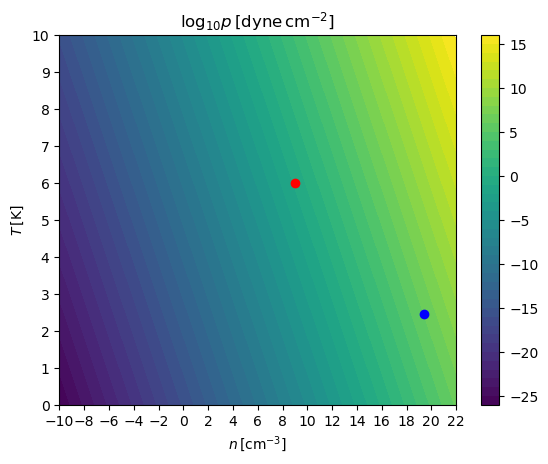

In [15]:
# Plot pressure again, including the two points above.
n1 = 9 #log
T1 = 6  #log

n2 = 19.3986343245
T2 = 2.47

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, np.log10(Z), levels=np.linspace(-26, 16, 43), cmap='viridis')

# Adding data points
ax.scatter(n1, T1, c='red')
ax.scatter(n2, T2, c='blue')
    
# Add a colorbar and customise axes
fig.colorbar(cp) 
ax.set_title(r'$\log_{10} p\,\rm [dyne\,cm^{-2}$]')
ax.set_xticks(np.arange(-10,23,2))
ax.set_xlabel(r'$n\,\rm [cm^{-3}]$')
ax.set_yticks(np.arange(0,11,1))
ax.set_ylabel(r'$T\,\rm [K]$')
plt.show()

#### 1.2.  Calculate the polytropic index of carbon-monoxide (CO) gas. Hint: Get the degrees of freedom first.



In [25]:
def polytropic_index(f):
    return f+2, f

In [46]:
CO_degreesOfFreedom = 6

a, b = polytropic_index(CO_degreesOfFreedom)

for i in range(2, 10):
    if (a%i==0 and b%i==0):
        a = a/i
        b = b/i
a=('%f' % a).rstrip('0').rstrip('.')
b=('%f' % b).rstrip('0').rstrip('.')
display(Markdown(rf"""$\gamma = \dfrac{a}{b}$"""))

$\gamma = \dfrac43$

#### 1.3. Calculate the mean particle mass (mean molecular weight) of air in our atmosphere (remember Nytrogen is the most abundant element). Once calculated, add it to the phase diagram $T$ vs. $\mu$ shown in class. How does the value compare to that of atomic hydrogen?

In [51]:
# Array for Xi values corresponding to Nitrogen, Oxygen and Argon respectively.
x = np.array([0.7808, 0.2095, 0.0093])

# Array for Ai values corresponding to N, O, Ar respectively.
A = np.array([14, 16, 40])

# Array for N values corresponding to N, O, Ar respectively.
Z = np.array([7, 8, 18])

In [70]:
# number of entries to the function
n = 3


In [78]:
#Function Mean particle mass with parameters a for molar fraction, b for atomic mass, c for atomic number and
#N for the number of entries (number of elements to be analized)

def mean_particle_mass(a, b, c, N):
    parameterArray = a/b
    sumation = 0
    for i in range (N):
        sumation += parameterArray[i]*(1+c[i])
    
    return 1/sumation

In [81]:
mu = mean_particle_mass(x, A, Z, n)
display(Markdown(rf"""$\mu = {mu}$"""))

$\mu = 1.759223277791094$